### Predicting airline delay with XGBoost Classifier

The data contains details about flight, schedule and the airline. 

Source: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

In [2]:
### Importing data

import pandas as pd

data = pd.read_csv(r"airlines_delay.csv")
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


### Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [4]:
data.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [5]:
data.Class.value_counts()  # Checking balance of data

0    299118
1    240264
Name: Class, dtype: int64

<AxesSubplot:xlabel='DayOfWeek', ylabel='Length'>

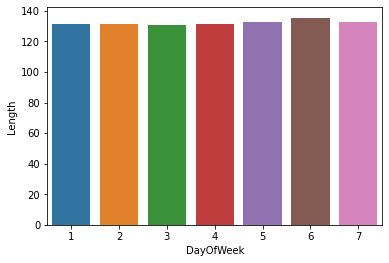

In [6]:
import seaborn as sns
sns.barplot(x = "DayOfWeek", y = "Length",data = data.groupby('DayOfWeek').mean().reset_index())

<AxesSubplot:xlabel='DayOfWeek', ylabel='Class'>

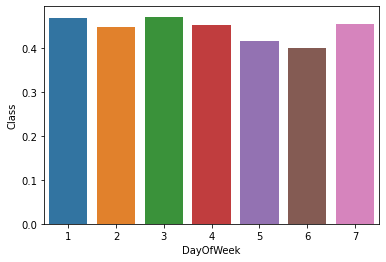

In [7]:
sns.barplot(x = "DayOfWeek", y = "Class",data = data.groupby('DayOfWeek').mean().reset_index())

<AxesSubplot:xlabel='Length', ylabel='Class'>

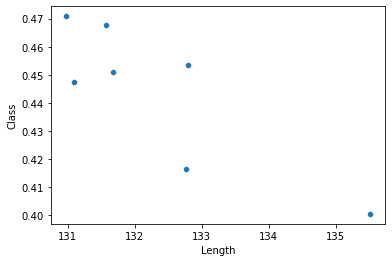

In [8]:
sns.scatterplot(x='Length', y='Class', data= data.groupby('DayOfWeek').mean().reset_index())

<AxesSubplot:>

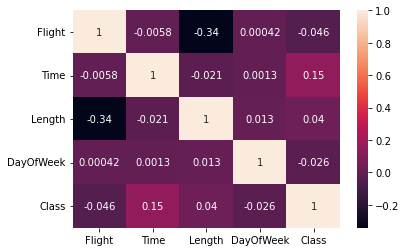

In [9]:
sns.heatmap(data= data.corr(), annot=True)

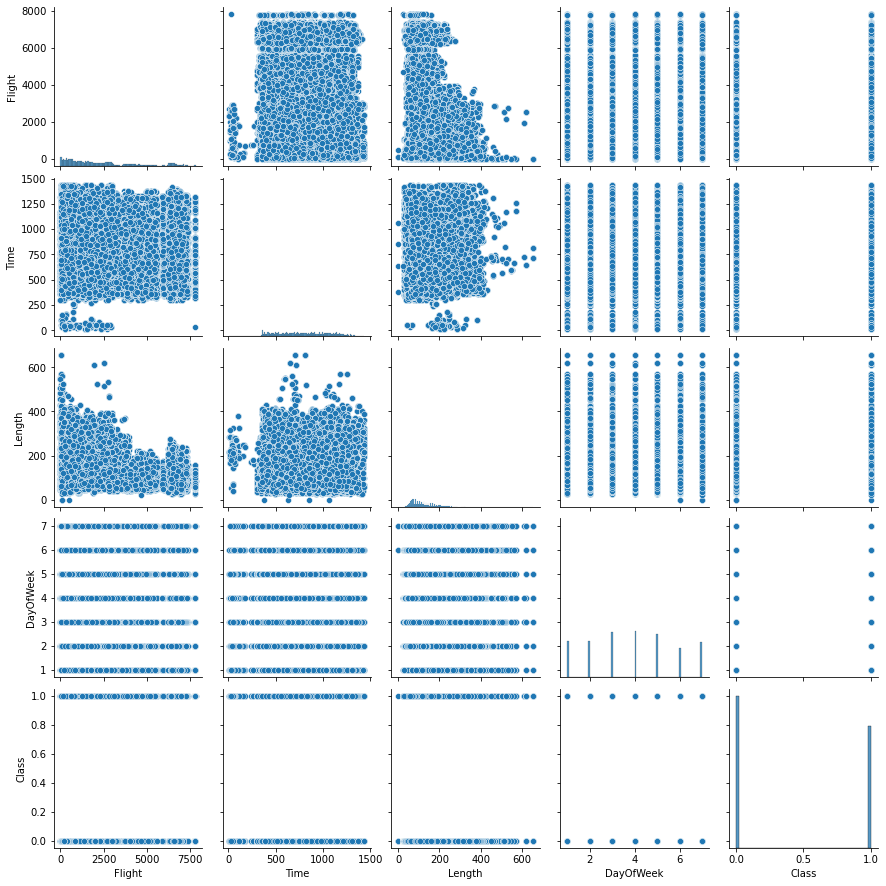

In [10]:
sns.pairplot(data = data)

### Preparing data for classification

Encoding the categorical features

In [11]:
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


the categorical features are 'Airline', 'AirportFrom' , 'AirportTo' and 'DayOfWeek'

In [12]:
X_cat = pd.get_dummies(data[['Airline', 'AirportFrom' , 'AirportTo']], drop_first=True)

In [13]:
X_num_cat = pd.get_dummies(data['DayOfWeek'], drop_first=True)

In [14]:
X_num_cat

,2,3,4,5,6,7
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
539377,0,0,0,1,0,0
539378,0,0,1,0,0,0
539379,1,0,0,0,0,0
539380,0,0,1,0,0,0


In [15]:
X_num = data[['Flight','Time', 'Length']]
X = pd.concat( [X_num, X_cat, X_num_cat], axis=1)

In [16]:
y = data['Class']

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Training 

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train,y_train)

In [19]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6620966471073537

### Comparing with the output of Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [22]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.6364285250794887